In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Для предсказания был найден более удобный для этого датасет стоимости поездки в такси
https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction

In [3]:
df = pd.read_csv('datasets/taxi_trip_pricing.csv')
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [11]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


#### Подготовка датасета

Заполнение пропусков

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [15]:
for col in df.columns:
    if df[col].dtype == 'object':
        mode_value = df[col].mode().iloc[0]
        df[col].fillna(mode_value, inplace=True)
    else:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

C:\Temp\ipykernel_10216\2527409577.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Temp\ipykernel_10216\2527409577.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       1000 non-null   float64
 1   Time_of_Day            1000 non-null   object 
 2   Day_of_Week            1000 non-null   object 
 3   Passenger_Count        1000 non-null   float64
 4   Traffic_Conditions     1000 non-null   object 
 5   Weather                1000 non-null   object 
 6   Base_Fare              1000 non-null   float64
 7   Per_Km_Rate            1000 non-null   float64
 8   Per_Minute_Rate        1000 non-null   float64
 9   Trip_Duration_Minutes  1000 non-null   float64
 10  Trip_Price             1000 non-null   float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


#### Анализ

In [17]:
num_arr = df.select_dtypes(include=['float64']).columns
cat_arr = df.select_dtypes(include=['object']).columns

Отношение числовых значений к кол-ву поездок

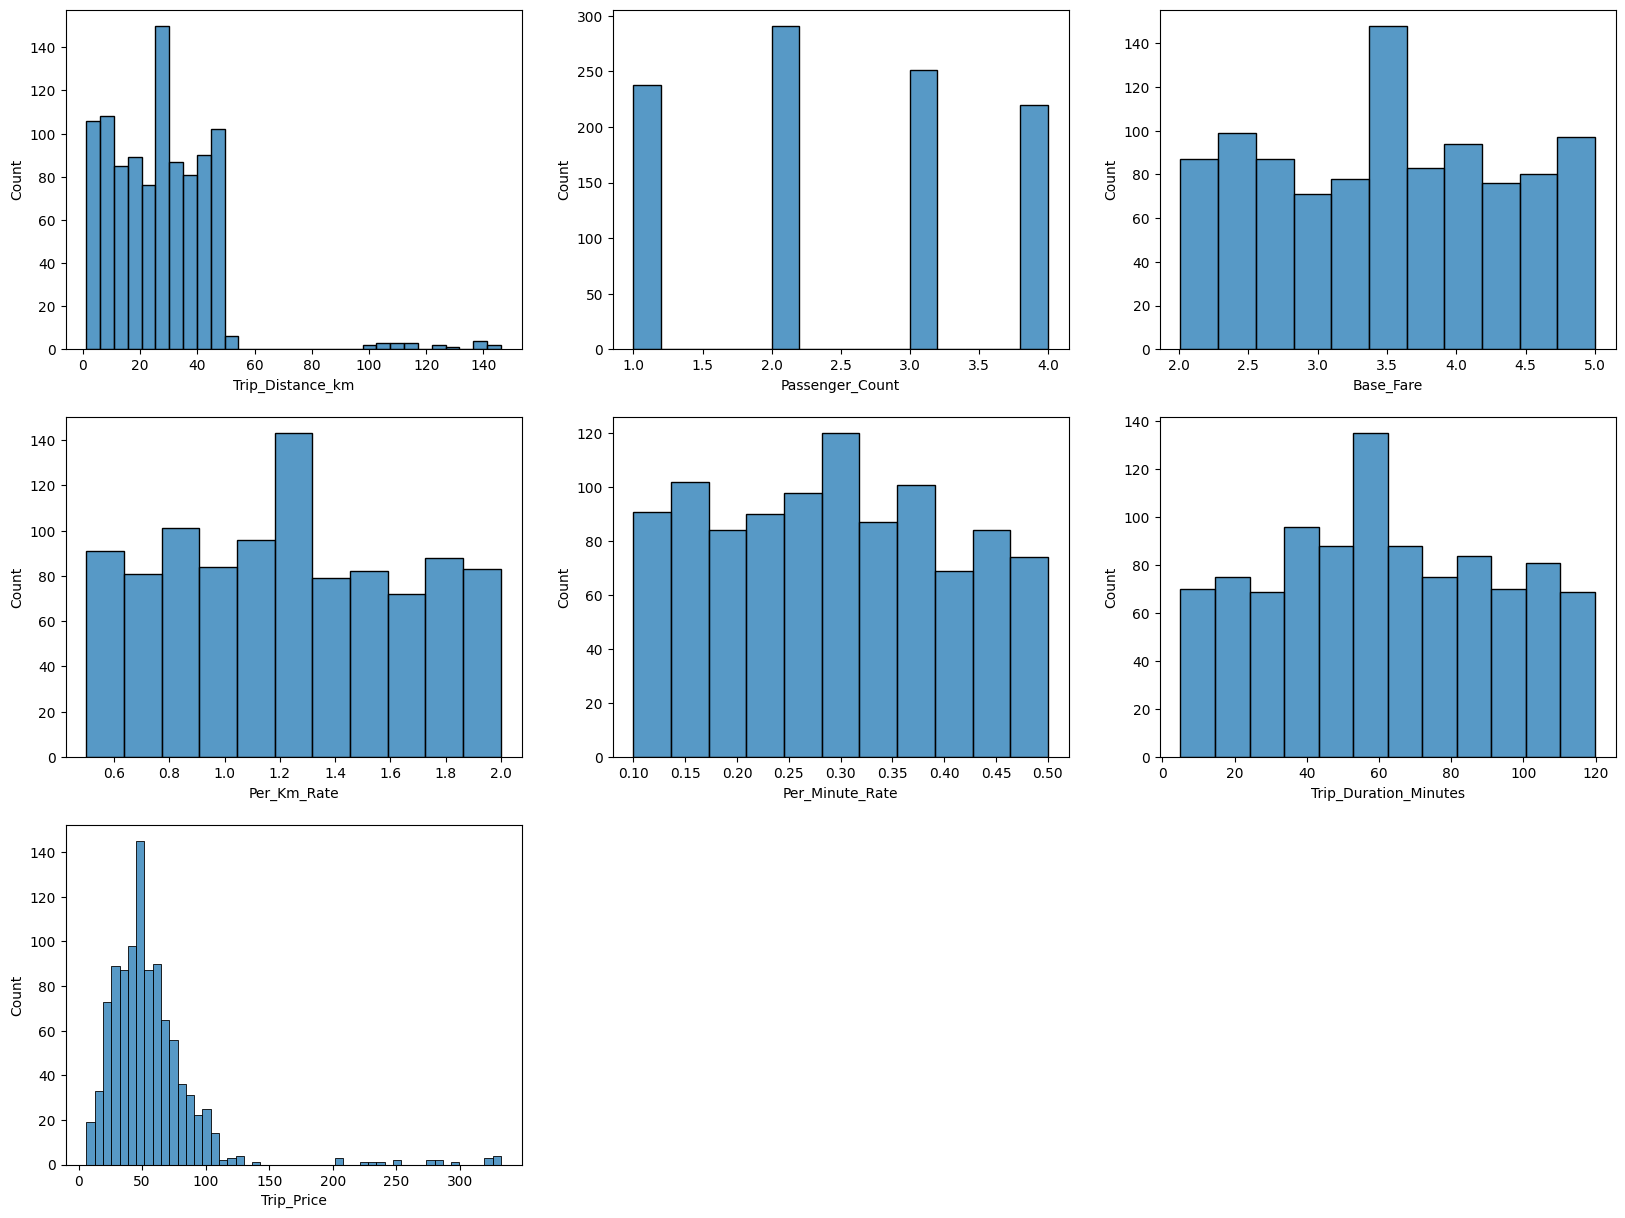

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i in range(3):
    for j in range(3):
        axes[i][j].set_visible(False)

for col in enumerate(num_arr):
    axes[col[0] // 3][col[0] % 3].set_visible(True)
    sns.histplot(data=df, x=col[1], ax= axes[col[0] // 3, col[0] % 3])
plt.show()

Интересное поведение на второй половине графиков цены и дистанции. Локальные максимумы в конце, вероятно связаны с междугородними или иными дальными поездками, однако не совсем понятно по какой причине мало поездок н 60-100 км.

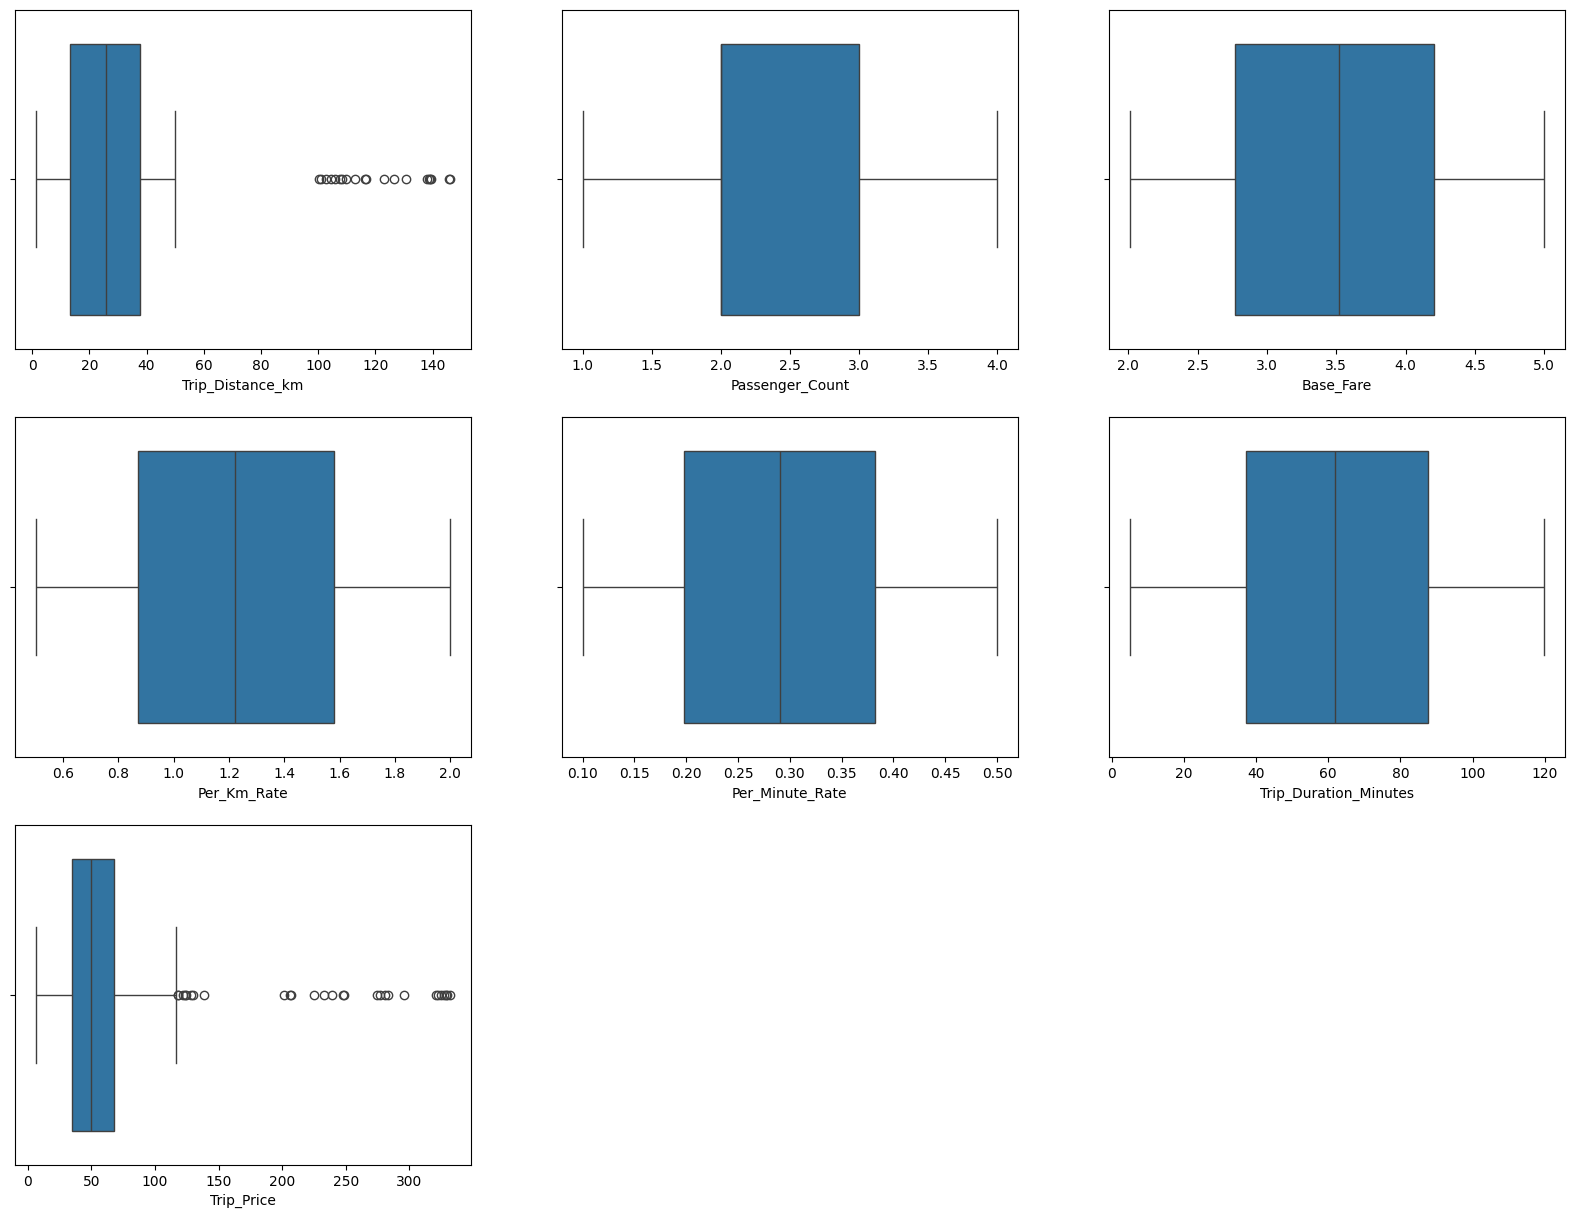

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i in range(3):
    for j in range(3):
        axes[i][j].set_visible(False)

for col in enumerate(num_arr):
    axes[col[0] // 3][col[0] % 3].set_visible(True)
    sns.boxplot(data=df, x=col[1], ax= axes[col[0] // 3, col[0] % 3]);
plt.show()

Отношение категориальных значений к кол-ву поездок

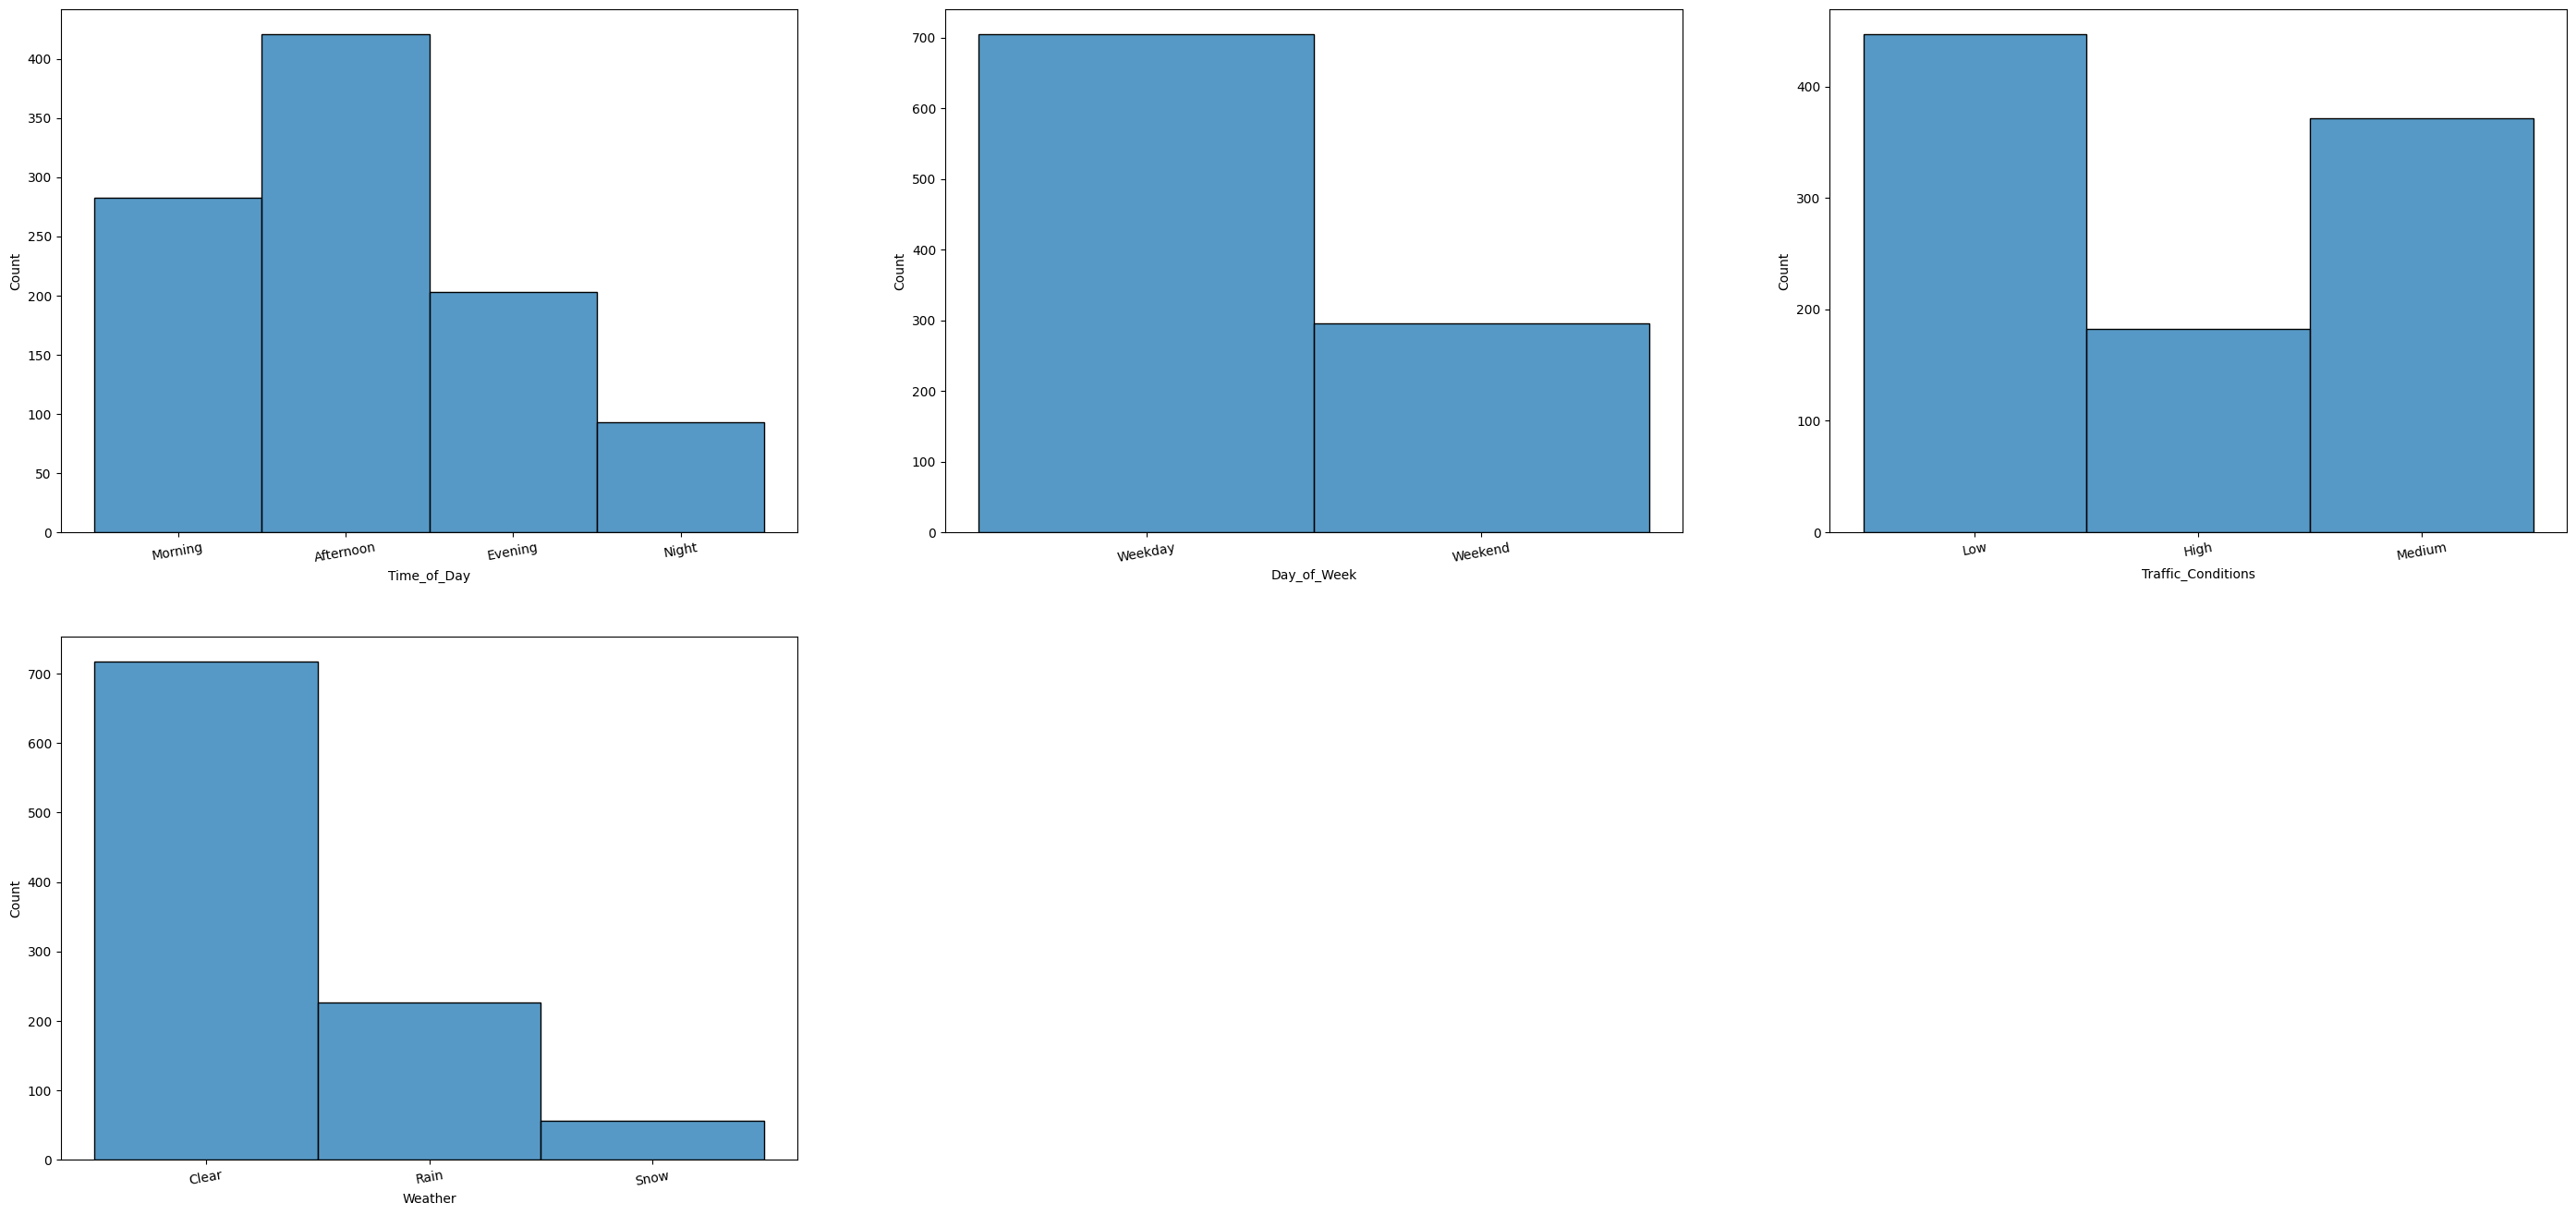

In [22]:
from matplotlib.ticker import FixedLocator, FixedFormatter
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(35, 25))

for i in range(3):
    for j in range(3):
        axes[i][j].set_visible(False)

for col in enumerate(cat_arr):
    axes[col[0] // 3][col[0] % 3].set_visible(True)
    ax= axes[col[0] // 3, col[0] % 3]
    sns.histplot(data=df, x=col[1], ax = ax)
    tick_labels = ax.get_xticklabels()

    locator = FixedLocator(range(len(tick_labels)))
    formatter = FixedFormatter([label.get_text() for label in tick_labels])

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=10)

axes[2][1].set_visible(False)
axes[2][2].set_visible(False)
plt.show()

На данных графиках аналогично отмечаются странности. Например, в плохую погоду поездок кратно меньше, хотя зачастую именно в это время люди предпочитают такси пешим прогулкам и общественному транспорту. Еще один странный момент со временем, днем поездок больше, чем утром и вечером, когда люди идут на работу или возвращяются. Есть подозрение на то, что датасет синтетический.

#### Отчистка выбросов

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

In [24]:
def is_outlier(x, mean, std):
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    return ~((x > lower_bound) & (x < upper_bound))

for col in ['Trip_Distance_km', 'Trip_Price']:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[col].apply(lambda x: is_outlier(x, mean, std))
    df = df[~outliers]

#### Регрессия

MSE: 97.12 (25.59)
MAE: 7.16 (0.88)
R2: 0.81 (0.04)
Explained Variance: 0.82 (0.04)


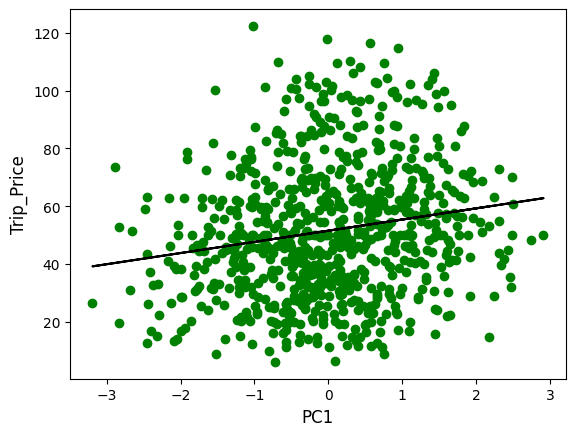

In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics._regression import explained_variance_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

def metrics_and_visualisation(model_class, df, **kwargs):
    model = model_class(**kwargs)
    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_arr)
        ],
        remainder='passthrough'
    )

    X = df.drop(['Trip_Price'], axis=1)
    y = df['Trip_Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

    kfold = KFold(n_splits=10, random_state=1, shuffle=True)

    metrics = {
        'MSE': make_scorer(mean_squared_error, greater_is_better=False),
        'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
        'R2': make_scorer(r2_score, greater_is_better=True),
        'Explained Variance': make_scorer(explained_variance_score, greater_is_better=True)
    }

    for metric_name, scorer in metrics.items():
        cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scorer)
        if scorer._sign >0:
            print(f'{metric_name}: {cv_results.mean():.2f} ({cv_results.std():.2f})')
        else:
            print(f'{metric_name}: {-cv_results.mean():.2f} ({cv_results.std():.2f})')

    X2 = X_train.copy()
    cat_cols = (X2.dtypes == 'object')

    ord_enc = OrdinalEncoder()

    X2[X2.columns[cat_cols]] = ord_enc.fit_transform(X2[X2.columns[cat_cols]])
    pipeline = Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=1))])
    
    X2[['PC1']] = pipeline.fit_transform(X2)
    X2 = X2[['PC1']].values
    y2 = y_train.values

    model2 = model_class(**kwargs)
    model2.fit(X2, y2)

    plt.scatter(X2, y2,color='g')
    plt.plot(X2, model2.predict(X2),color='k')
    plt.ylabel('Trip_Price', size=12)
    plt.xlabel('PC1', size=12)
    plt.show()

metrics_and_visualisation(LinearRegression, df)

MSE: 147.54 (25.40)
MAE: 9.01 (0.68)
R2: 0.72 (0.03)
Explained Variance: 0.72 (0.04)


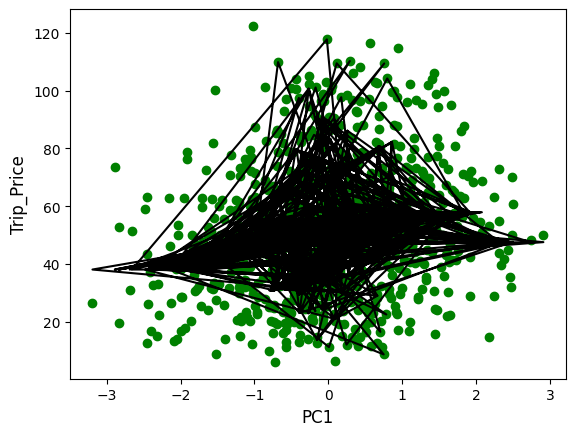

In [28]:
from sklearn.tree import DecisionTreeRegressor
metrics_and_visualisation(DecisionTreeRegressor, df, max_leaf_nodes=80)

MSE: 79.02 (25.78)
MAE: 5.94 (0.58)
R2: 0.85 (0.04)
Explained Variance: 0.85 (0.04)


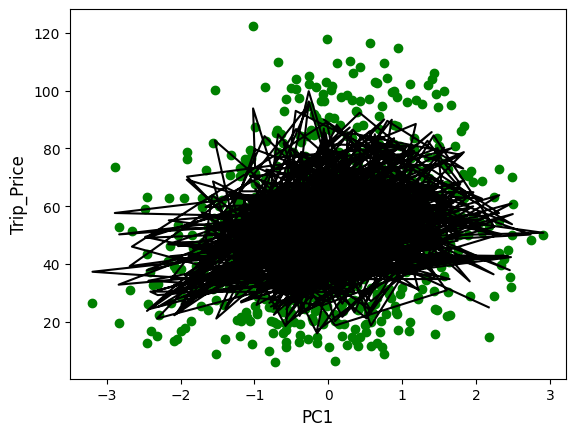

In [29]:
from sklearn.ensemble import RandomForestRegressor
metrics_and_visualisation(RandomForestRegressor, df)

MSE: 104.71 (22.29)
MAE: 7.63 (0.88)
R2: 0.80 (0.03)
Explained Variance: 0.80 (0.03)


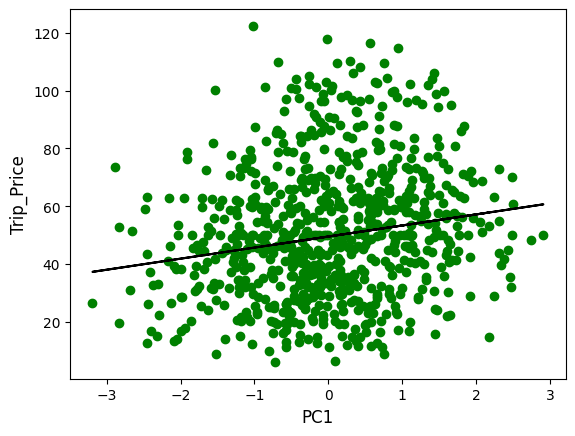

In [30]:
from sklearn.svm import SVR
metrics_and_visualisation(SVR, df, kernel='linear')

MSE: 114.06 (22.39)
MAE: 8.09 (0.89)
R2: 0.78 (0.03)
Explained Variance: 0.78 (0.03)


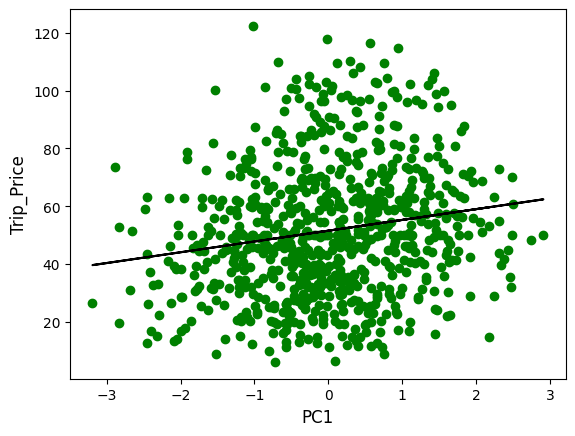

In [32]:
from sklearn.linear_model import ElasticNet
metrics_and_visualisation(ElasticNet, df, alpha=0.1, l1_ratio=0.8)

MSE: 72.71 (27.63)
MAE: 5.44 (0.70)
R2: 0.86 (0.04)
Explained Variance: 0.86 (0.04)


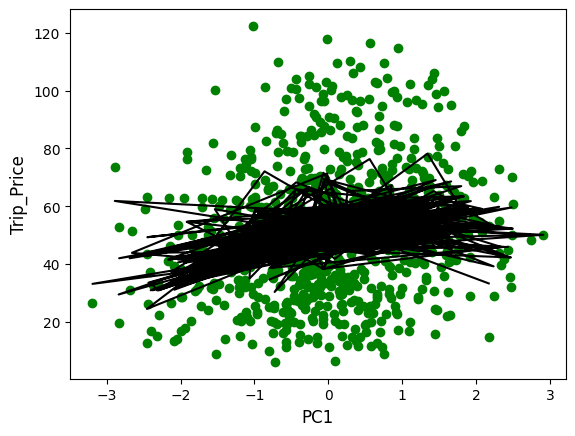

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
metrics_and_visualisation(GradientBoostingRegressor, df)

Лучшие метрики у случайного леса и градиентного бустинга